# Reference Code 

#### https://github.com/Rubens10010/Fingerprint-Classification-System/blob/master/FCS%20-%20proyect/Data%20Preprocessing%20Module/thinning.py

In [ ]:
import cv2
import numpy as np

if(len(sys.argv)<2):
    img_name = 'test.png'
elif(len(sys.argv) >= 2):
    img_name = sys.argv[1];
img = cv2.imread(img_name,0) # works in images without noise
print(img)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while(not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

skel = cv2.bitwise_not(skel)
cv2.imshow("skel",skel)
#print(skel[100])
cv2.imwrite("thinned_" +img_name, skel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# thinning -> skeletonization
  #print(img)
  size = np.size(img)
  skel = np.zeros(img.shape,np.uint8)

  #ret,img = cv2.adaptiveThreshold  (img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
  #cv2.THRESH_BINARY,11,2)
  ret,img = cv2.threshold(img,127,255,0)
  element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
  done = False
   
  while(not done):
      eroded = cv2.erode(img,element)
      temp = cv2.dilate(eroded,element)
      temp = cv2.subtract(img,temp)
      skel = cv2.bitwise_or(skel,temp)
      img = eroded.copy()
   
      zeros = size - cv2.countNonZero(img)
      if zeros==size:
          done = True

  skel = cv2.bitwise_not(skel)
  #cv2.imwrite("thinned.bmp", skel)}
  o_name = img_name.split("/")
  o_name = o_name[3]
  scipy.misc.imsave('fingerprint_thinned/' + o_name, skel)

# Edited code

### _Change working directory and read in data_

In [1]:
# Import the os module
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Data-Preprocessing/Gabor-Filtered')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\leona\OneDrive\DSA4199\NIST-Classification\Data-Preprocessing
Current working directory: C:\Users\leona\OneDrive\DSA4199\NIST-Classification\Data-Preprocessing\Gabor-Filtered


In [2]:
data = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Data-Preprocessing/Gabor-Filtered/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Data-Preprocessing/Gabor-Filtered')]

In [27]:
len(data)

3999

### _View example image and thin it_

In [16]:
import cv2
import numpy as np 

img = cv2.imread(data[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

#ret,img = cv2.adaptiveThreshold  (img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#cv2.THRESH_BINARY,11,2)
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
   
while(not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
   
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

skel = cv2.bitwise_not(skel)
#cv2.imwrite("thinned.bmp", skel)}

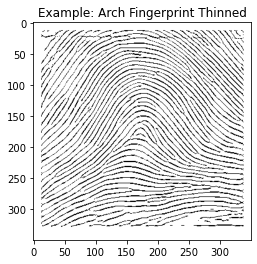

In [17]:
from matplotlib import pyplot as plt
import cv2

plt.imshow(skel,cmap='gray')
plt.title('Example: Arch Fingerprint Thinned')
plt.show()

### _Thinning all the images_

In [43]:
import cv2
import numpy as np 

data_thinned = []
for x in range(len(data)):
    img = cv2.imread(data[x])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    #ret,img = cv2.adaptiveThreshold  (img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
    #cv2.THRESH_BINARY,11,2)
    ret,img = cv2.threshold(img,127,255,0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False
   
    while(not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()
   
        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True

    skel = cv2.bitwise_not(skel)
    data_thinned.append(skel)

### _Saving the thinned images_

In [44]:
names = ['A_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A')]
names.extend(['LL_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/LL')])
names.extend(['RL_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/RL')])
names.extend(['TA_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/TA')])
names.extend(['W_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/W')])
names[0]

'A_f0005_03.png'

In [80]:
import cv2
import os
os.chdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Data-Preprocessing/Thinning')
for x in range(len(data_thinned)):
    cv2.imwrite(names[x],data_thinned[x])

### _Train Val Split_

80% - train set,
20% - val set

In [10]:
# Import the os module
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\leona\OneDrive\DSA4199\NIST-Classification\NIST
Current working directory: C:\Users\leona\OneDrive\DSA4199\NIST-Classification\NIST


In [11]:
names = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A')]
names.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/LL_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/LL')])
names.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/RL_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/RL')])
names.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/TA_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/TA')])
names.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/W_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/W')])
names

['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0005_03.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0006_09.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0012_01.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0013_03.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0015_01.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0016_08.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0018_08.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0020_06.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0027_08.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0030_10.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0031_02.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0032_03.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Raw/A_f0043_08.png',
 'C:/Users/leona/OneDrive

In [13]:
data = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A')]
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/LL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/LL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/RL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/RL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/TA/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/TA')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/W/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/W')])
data

['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0005_03.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0006_09.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0012_01.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0013_03.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0015_01.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0016_08.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0018_08.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0020_06.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0027_08.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0030_10.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0031_02.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0032_03.png',
 'C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A/f0043_08.png',
 'C:/Users/l

In [3]:
import random
import numpy as np 
import os
np.random.seed(1)
idx = np.random.choice(range(3999), 3999,replace=False)
sets = np.split(idx, [int(.8 * len(idx))])

In [6]:
sets

[array([ 200, 1078,  610, ..., 1739, 2076, 2342]),
 array([ 113,  245, 1439, 1022,  980,  411, 2261, 1062,  116, 3849, 3579,
         247,  665, 3893, 3443,   92,  114, 1376, 2302, 2477, 2636, 3573,
         118, 1981, 2180,  162,  263, 3492, 1313,  246, 3446,  775,  552,
        1113, 3290,  580,  844, 1460, 3292,  651, 1170, 3190, 3011, 3921,
        2581, 2910, 3912, 3370, 1368,  897, 3885, 3930,  676,   14, 2548,
         967, 1106,  240, 1254, 2648, 2923, 2321, 1936,  684,  168, 1639,
        1133, 2419, 1878, 1715,  271, 2653, 1473, 1253, 1547,  214, 3631,
         344,  838, 1615, 2195, 1835, 3069,  795,  412, 1712, 3271, 2831,
         342,  947, 2795, 2221, 1757,  377, 1491,  738, 3375,   52,   18,
        1309, 2269, 2450,  998, 3094, 1389, 3188,   95, 1499, 2309, 3222,
        2590, 3395,  179, 3174, 1598,  716, 2976,  184,  467,  903, 3593,
          71, 3217, 3419, 1898, 3752, 2394, 3634, 1207, 2077, 3814, 2844,
        1063, 1528, 2205, 2980,  658, 3747, 1838, 2442, 1076,

In [77]:
training_names = [names[i] for i in sets[0].tolist()]
test_names = [names[i] for i in sets[1].tolist()]

data_train = [data_thinned[i] for i in sets[0].tolist()]
data_test = [data_thinned[i] for i in sets[1].tolist()]

In [78]:
import cv2
import os
os.chdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-Training/Train')
for x in range(len(sets[0])):
    cv2.imwrite(training_names[x],data_train[x])

In [79]:
import cv2
import os
os.chdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-Training/Test')
for x in range(len(sets[1])):
    cv2.imwrite(test_names[x],data_test[x])